<a href="https://colab.research.google.com/github/DewliniHerath/Telco_Churn_Predictor/blob/main/notebooks/Telco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Step 01: Mount the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 02: Remove unnecessary warnings

In [3]:
import warnings, os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3' # shows only errors
pd.options.mode.chained_assignment = None

Step 03: Load CSV from Drive

In [4]:
file_path = '/content/drive/MyDrive/ML_Coursework/Telco-Customer-Churn.csv'
telco_df = pd.read_csv(file_path)
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *Phase 01 : General analysis including duplicates and missing values*

Step 01: Analyse the data

In [5]:
# Shape of dataset
print("Dataset shape:", telco_df.shape)
# Column names
print("Column Names\n", telco_df.columns)
# Data types and non-null counts
print(telco_df.info())
# Numerical columns
print("Numerical Data\n", telco_df.describe())
# For all columns including categorical
print("Summary of all columns\n", telco_df.describe(include='all'))

Dataset shape: (7043, 21)
Column Names
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8

In [6]:
# Finding missing values
print("Missing Values\n", telco_df.isnull().sum())

Missing Values
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64




---
✅ *Positive deduction: there are no missing values across the dataset*

❌*Negative deduction: by observing the data types, "TotalCharges" should be an integer or float but it's an object*




---





Step 02: Convert "TotalCharges" data type to numeric to help in data visualization

In [7]:
# first check whether there are any blank strings in the column 'TotalCharges"
# before converting to numeric
blank_count = (telco_df['TotalCharges']==' ').sum()
print("Blank strings in TotalCharges:", blank_count)


Blank strings in TotalCharges: 11




---

❗*The **TotalCharges** column contain blank string entries which are non-numeric which will cause conversion errors, thus we replace with NaN the standard placeholder in pandas for missing values.*


---



In [8]:
# firstly replace the blank strings with NaN
telco_df['TotalCharges'] = telco_df['TotalCharges'].str.strip()
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(' ',np.nan)
# secondly convert to float
telco_df['TotalCharges']= pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
# check the number of NaNs that are available
print("Number of NaNs:", telco_df['TotalCharges'].isna().sum())
# check the type of the column
print("Data type of TotalCharges:",telco_df['TotalCharges'].dtype)

Number of NaNs: 11
Data type of TotalCharges: float64


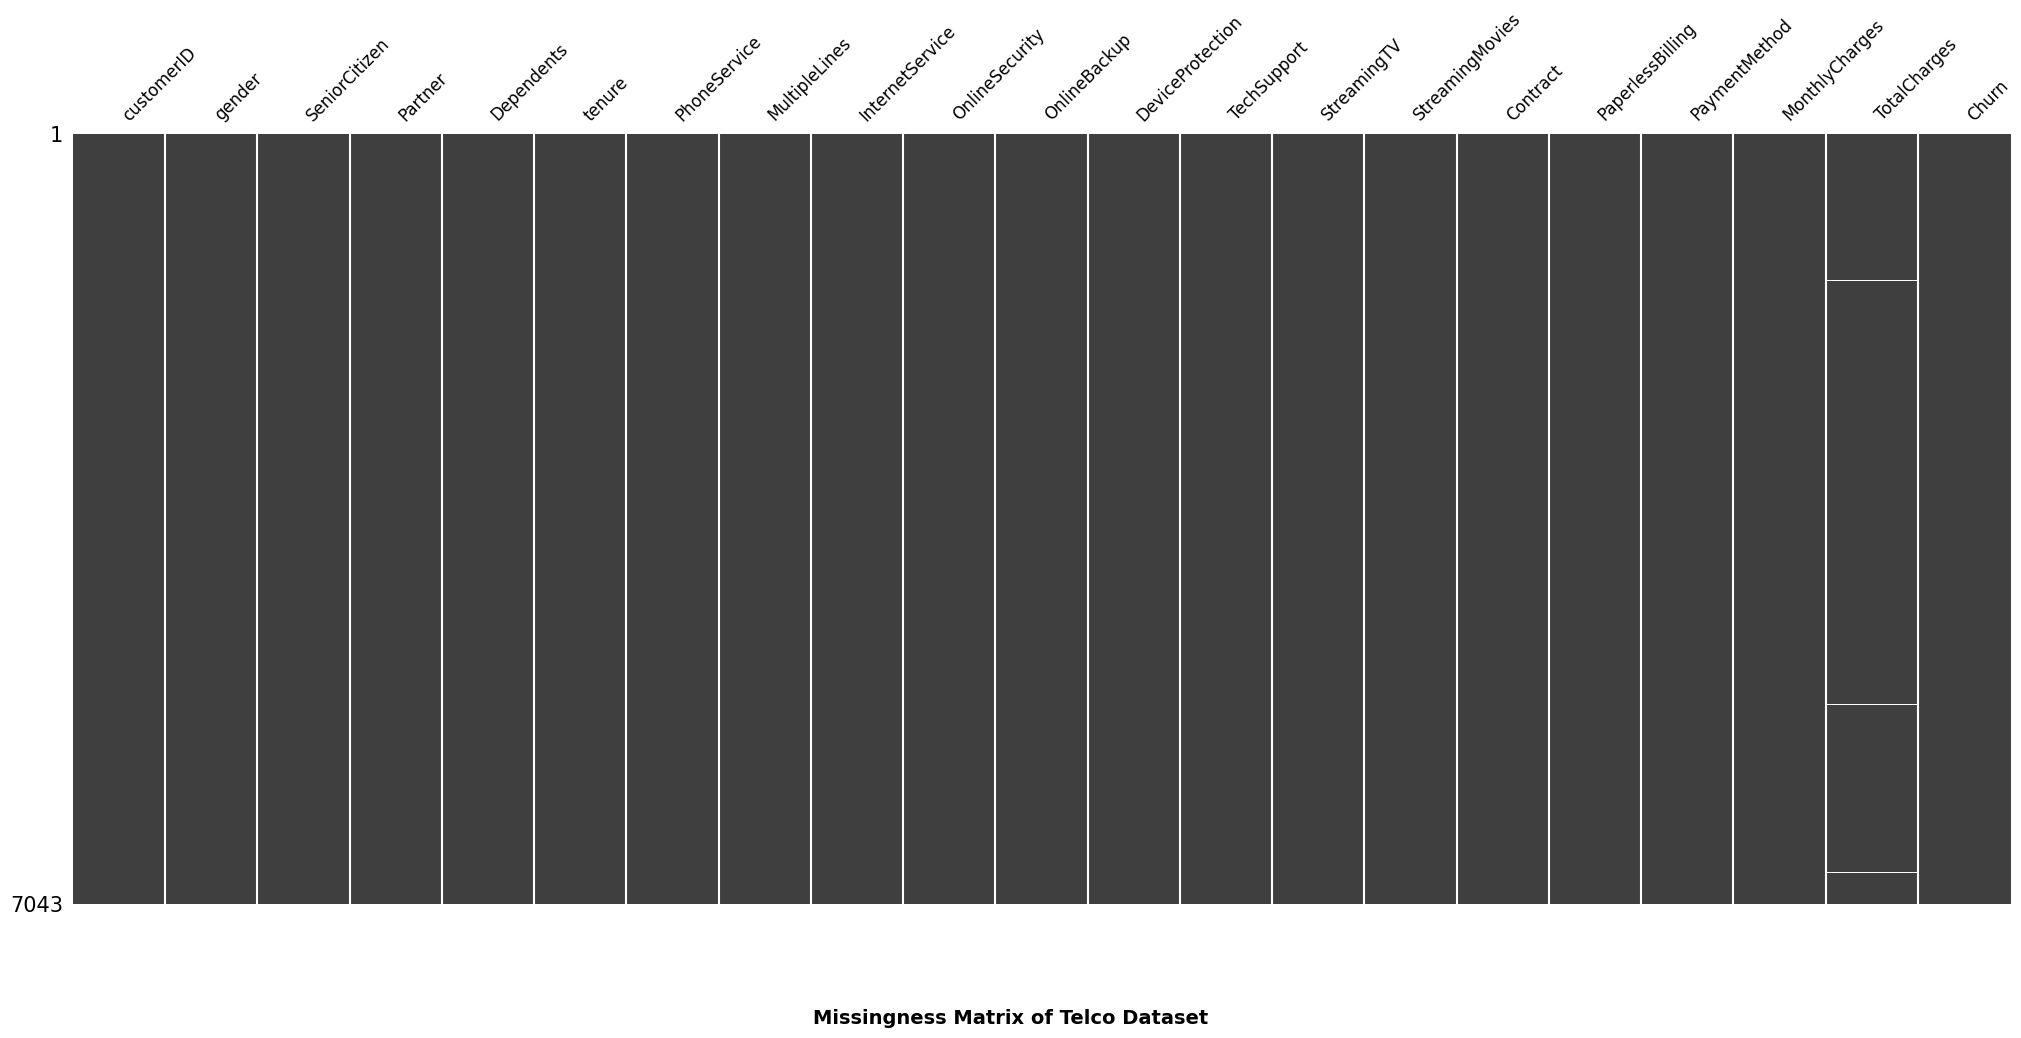

In [9]:
# visualize the NaNs in TotalCharges
msno.matrix(telco_df,fontsize =12, sparkline=False)
plt.figtext(0.5,-0.01,"Missingness Matrix of Telco Dataset",ha='center',fontsize=14,fontweight='bold')
plt.savefig('/content/drive/MyDrive/ML_Coursework/missing_values_matrix.png',bbox_inches='tight')
plt.show()

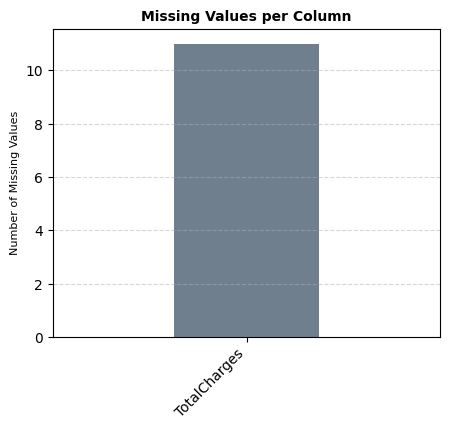

In [10]:
# visualizing missing values across dataset
missing_counts = telco_df.isna().sum()
missing_counts = missing_counts[missing_counts>0]
plt.figure(figsize=(5,4))
missing_counts.plot(kind='bar',color='#34495E', alpha=0.7,width=0.3)
plt.title("Missing Values per Column", fontsize=10,fontweight='bold')
plt.ylabel("Number of Missing Values",fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/ML_Coursework/missing_values_plot.png',bbox_inches='tight')
plt.show()

Step 03: Checking for Duplicate Rows

In [11]:
#count duplicate rows
duplicate_count = telco_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0




---

✅*Positive Deduction: there are no duplicate rows*


---



✨Final Deductions through phase 01


*   'TotalCharges' have 11 missing values
*   The dataset has no duplicate rows



### *Phase 02: Univariate Analysis*

Examining each variable in isolation { foundation for further analysis }

Step 01: Identify the columns in the dataset

In [12]:
# list all column names
print(telco_df.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [13]:
# identify columns by dtype
num_cols = telco_df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = telco_df.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:",cat_cols)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


✔ *Deduction: 'SeniorCitizen' is mentioned as a numerical column however,logically it should be a categorical*

In [14]:
# converting to categorical for visualization purposes
telco_df['SeniorCitizen'] =telco_df['SeniorCitizen'].map({0:'No',1:'Yes'})
print(telco_df['SeniorCitizen'].dtype)

object


Step 02: Apply Univariate Analysis for Categorical Columns

In [15]:
# observe the unique categories
cat_cols = telco_df.select_dtypes(include=['object','category','bool']).columns.tolist()
for col in cat_cols:
  print(f"{col}:{telco_df[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:['No' 'Yes']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


✔*Deduction: in 'MultipleLines' column "No phone service" and "No" has different meanings*

*   No = has phone service but no multiple lines
*   No phone service = does not have phone service

✔*Deduction: in 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' columns "No internet service" and "No" has different meanings*


*   No = has internet service but does not use that specific add-on
*   No internet service = does not have internet service





In [16]:

# function to visualize countplots for categorical data
def plot_categorical_univariate(df,exclude_cols=None, n_cols=3,palette="husl"):
  cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

  # remove columns that doesn't needed to be plotted
  if exclude_cols:
    cat_cols = [col for col in cat_cols if col not in exclude_cols]

  # calculating number of rows of subplots
  n_rows = (len(cat_cols) + n_cols-1)//n_cols
  # creating grid of subplots with right size
  fig, axes = plt.subplots(n_rows,n_cols,figsize=(18,4*n_rows))
  fig.suptitle("Univariate Analysis - Categorical Features",fontsize=20, fontweight='bold')
  # convert subplot grid into a flat list for looping purposes
  axes = axes.flatten()

  # loops through each category and creates countplot
  for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df,palette=palette, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

  # deleting unused subplot slots
  for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

  # adjust the layout of plots
  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/univariate_categorical.png',bbox_inches='tight')
  plt.show()

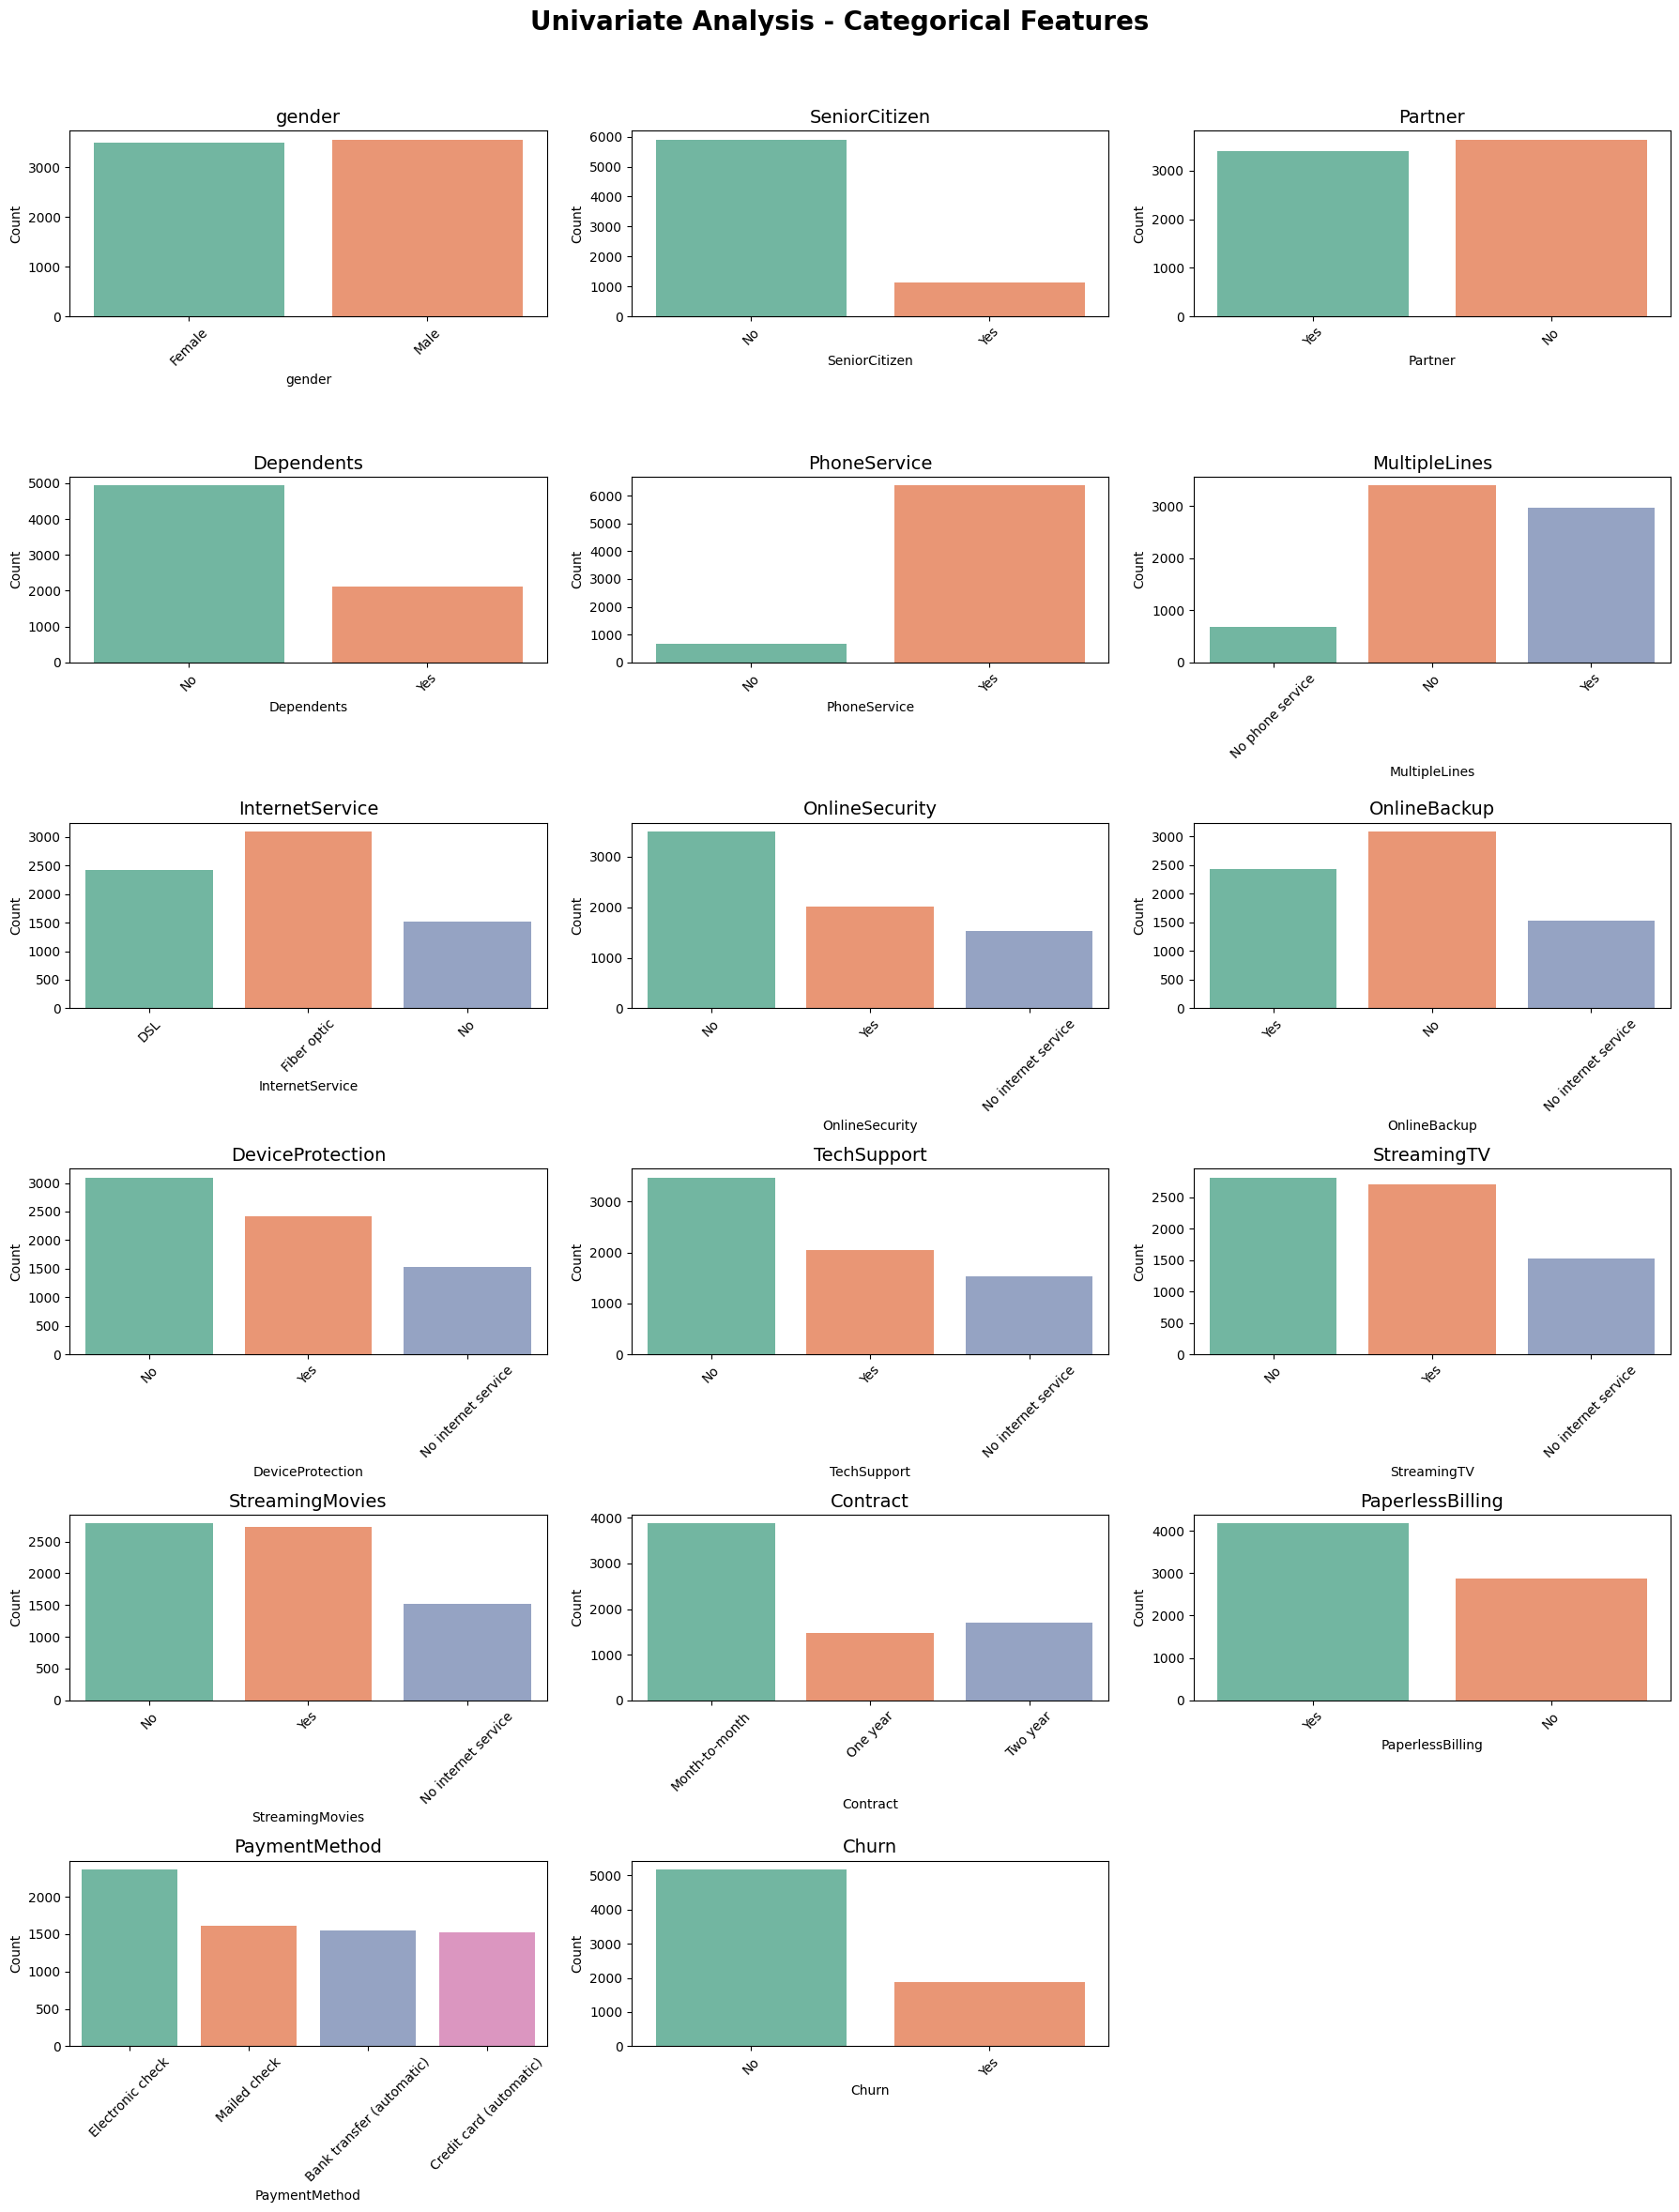

In [17]:
# using above function
plot_categorical_univariate(telco_df,exclude_cols=['customerID'],n_cols=3,palette="Set2")

In [18]:
# function to visualize frequency tables
def plot_categorical_frequency_table(df, exclude_cols=None,n_cols=3):
  cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
  if exclude_cols:
    cat_cols = [col for col in cat_cols if col not in exclude_cols]

  # make sure when caluclatingwe round up such that we do not end up with less rows
  n_rows = (len(cat_cols)+ n_cols -1)// n_cols
  fig, axes = plt.subplots(n_rows,n_cols, figsize=(18,4*n_rows))
  fig.suptitle("Univariate Analysis - Frequency Tables (Percentages)", fontsize= 20, fontweight = 'bold')
  axes = axes.flatten()
  for i, col in enumerate(cat_cols):
    freq_table = df[col].value_counts(normalize=True).round(3)*100

    # convert to dataframe for displaying
    table_data = freq_table.reset_index()
    table_data.columns = [col, 'Percentage']

    axes[i].axis('off')
    # layout the data in the table (making sure text in center of cell)
    table = axes[i].table(cellText=table_data.values,
                          colLabels=table_data.columns,
                          cellLoc='center',
                          loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    axes[i].set_title(col, fontsize=14)

  # Delete unused subplot slots after all plots have been created
  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/univariate_categorical_frequencyTable.png',bbox_inches='tight')
  plt.show()

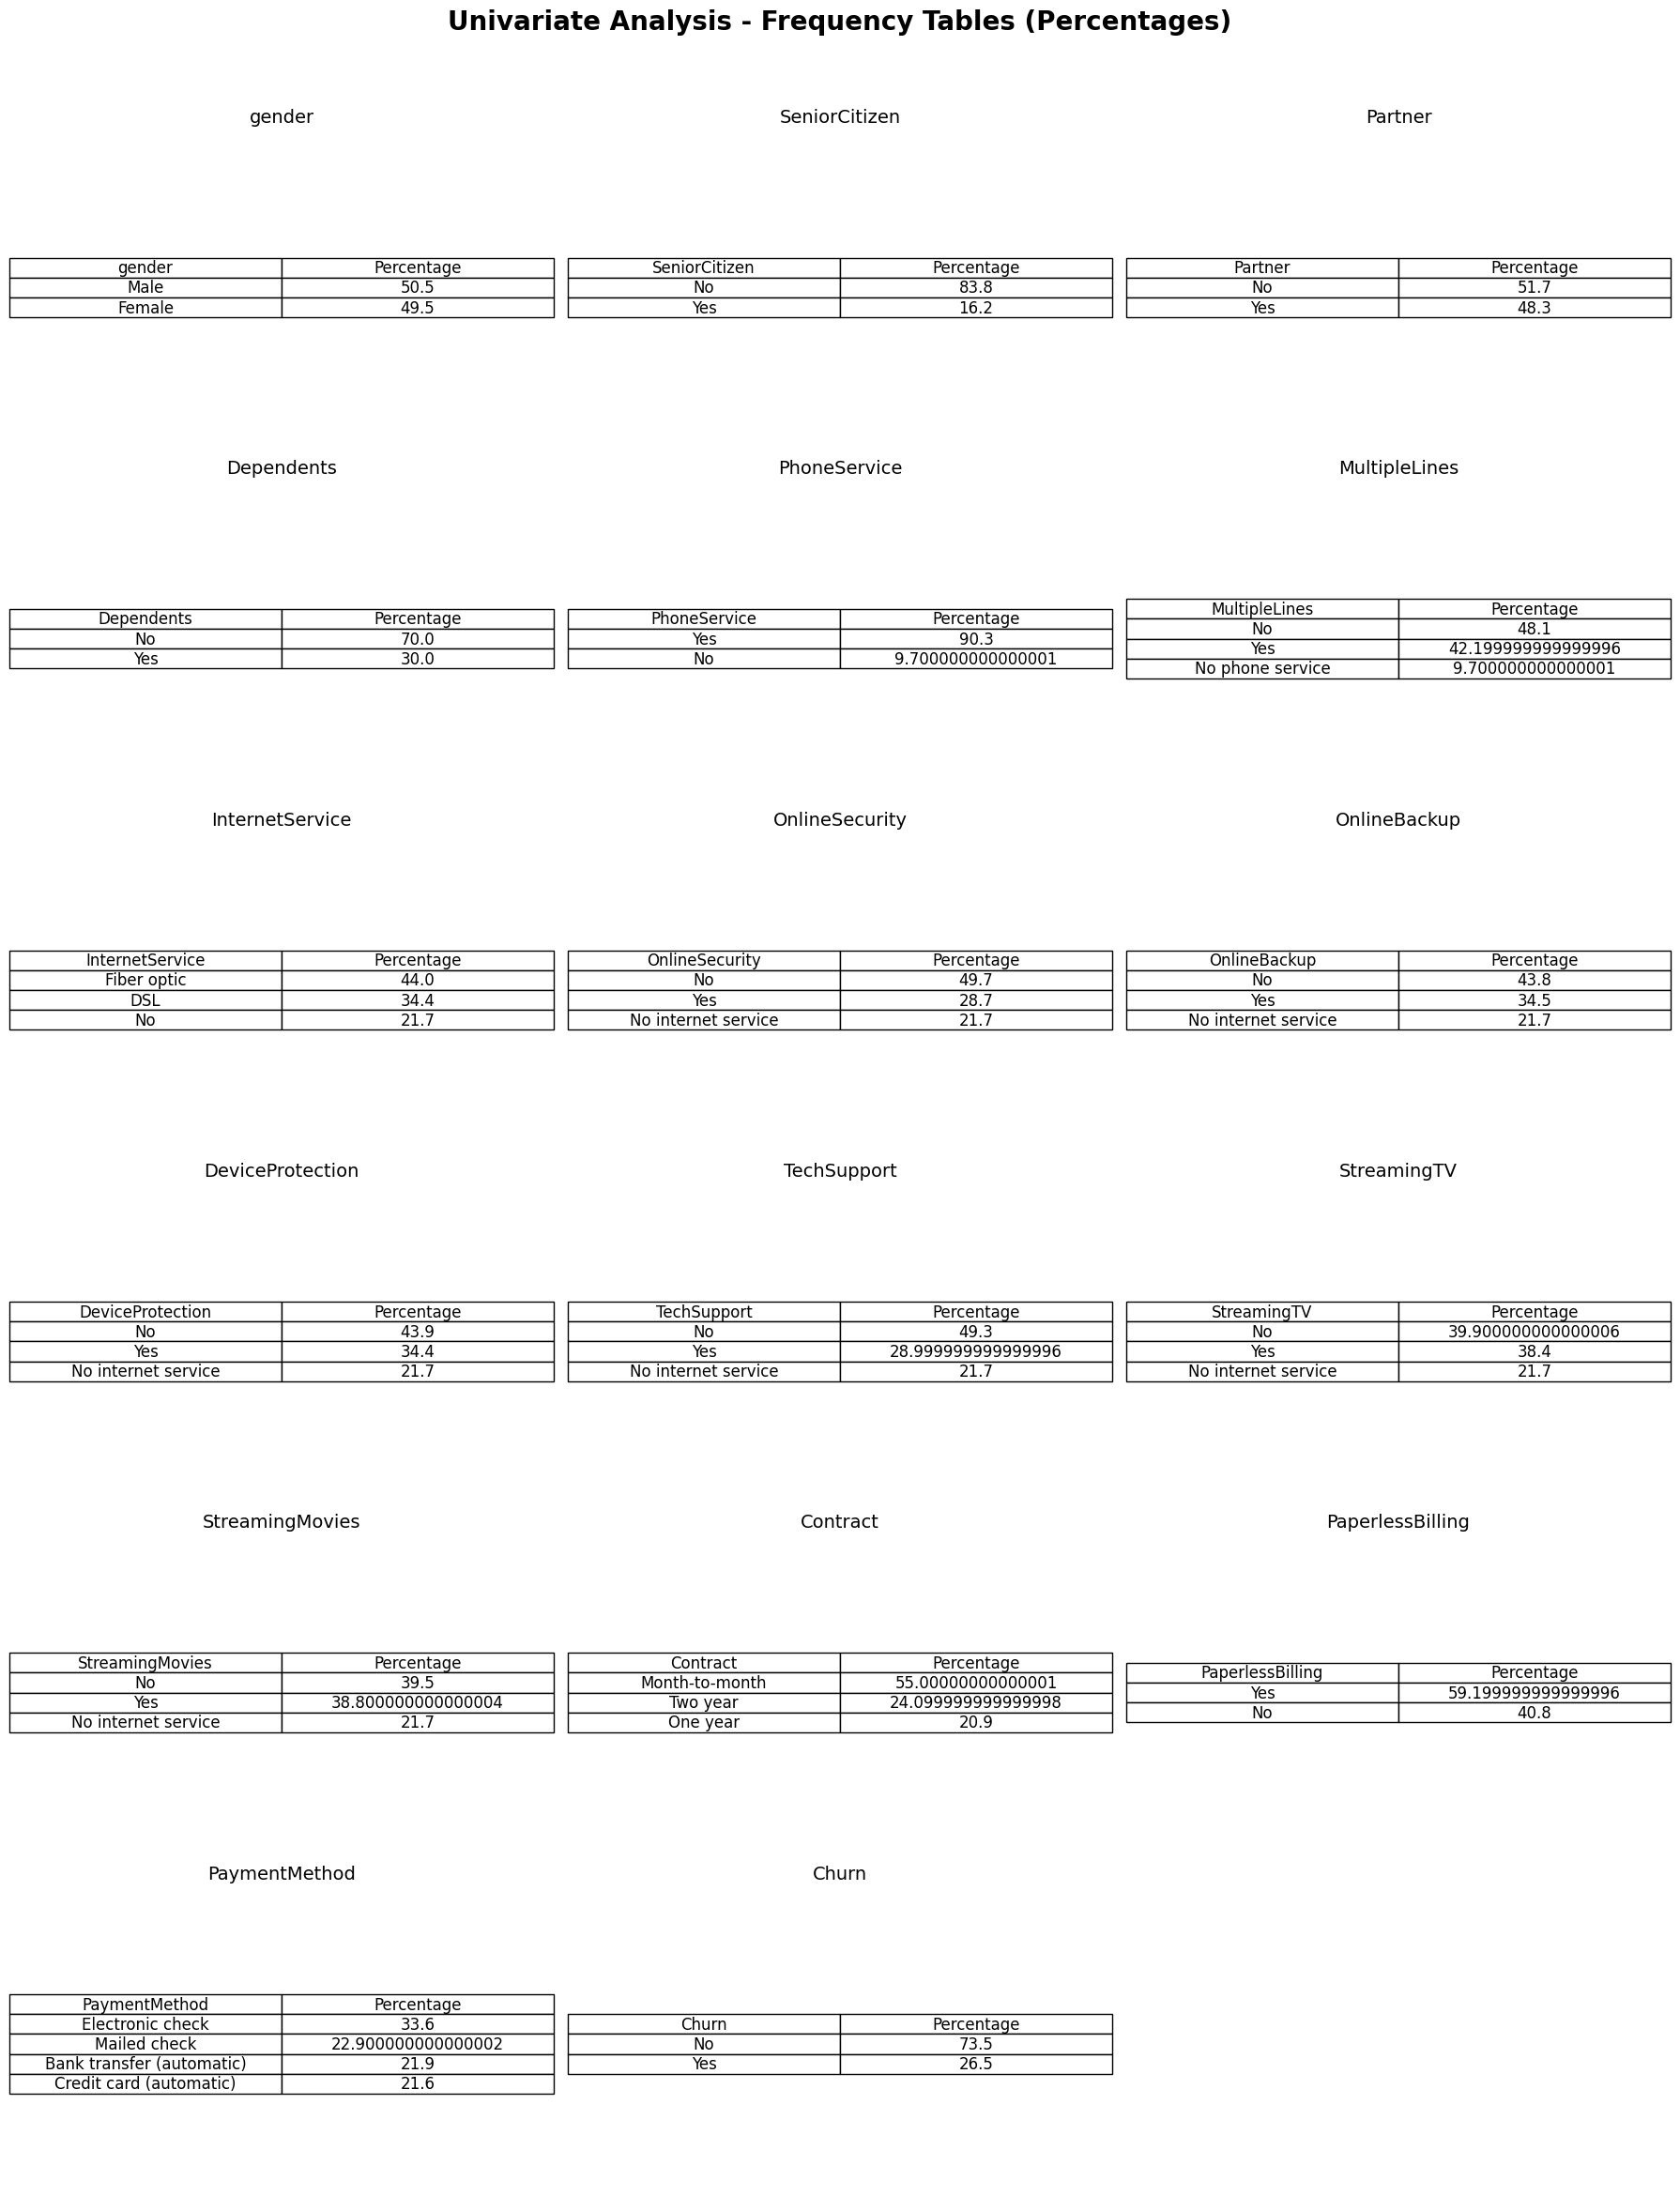

In [19]:
# using above function
plot_categorical_frequency_table(telco_df, exclude_cols=['customerID'],n_cols=3)

Step 03: Apply Univariate Analysis for Numerical Columns

In [20]:
# histogram for the numerical columns
def plot_numerical_histogram(df, exclude_cols=None,n_cols=3, bins=30, kde=True,palette="husl"):
  num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
  if exclude_cols:
    num_cols = [col for col in num_cols if col not in exclude_cols]
  n_rows = (len(num_cols)+n_cols-1)//n_cols
  fig,axes = plt.subplots(n_rows,n_cols, figsize=(18,4*n_rows))
  fig.suptitle("Univariate Analysis - Numerical Features (Histrograms)", fontsize=20, fontweight='bold')
  axes = axes.flatten()
  colors = sns.color_palette(palette,len(num_cols))
  for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=bins, kde=kde,ax=axes[i],color=colors[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
  for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/univariate_numerical_histrogram.png',bbox_inches='tight')
  plt.show()

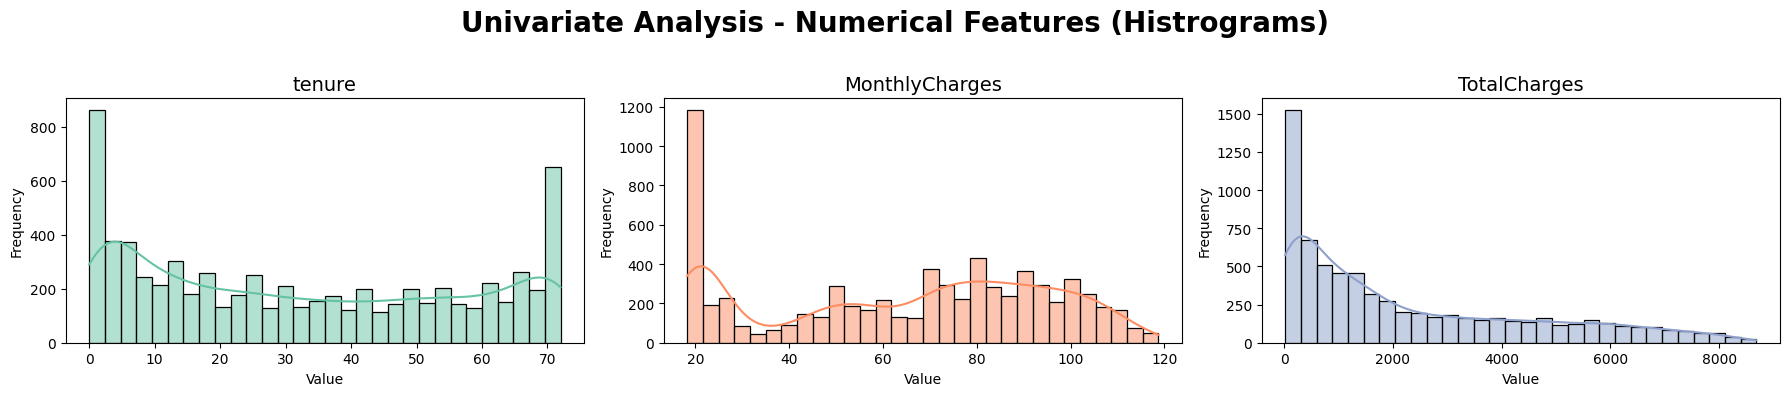

In [21]:
# using above function
plot_numerical_histogram(telco_df, exclude_cols=None,n_cols=3, bins=30, kde=True,palette="Set2")

In [22]:
# boxplot for numerical columns
def plot_numerical_boxplot(df, exclude_cols=None,n_cols=3, palette="husl"):
  num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
  if exclude_cols:
    num_cols = [col for col in num_cols if col not in exclude_cols]
  n_rows = (len(num_cols)+n_cols-1)//n_cols
  fig, axes = plt.subplots(n_rows,n_cols, figsize=(18,4*n_rows))
  fig.suptitle("Univariate Analysis - Numerical Features (Boxplots)", fontsize=20, fontweight='bold')
  axes =axes.flatten()
  colors = sns.color_palette(palette,len(num_cols))
  for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col].dropna(), ax=axes[i],color=colors[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("")
  for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/univariate_numerical_boxplot.png',bbox_inches='tight')
  plt.show()


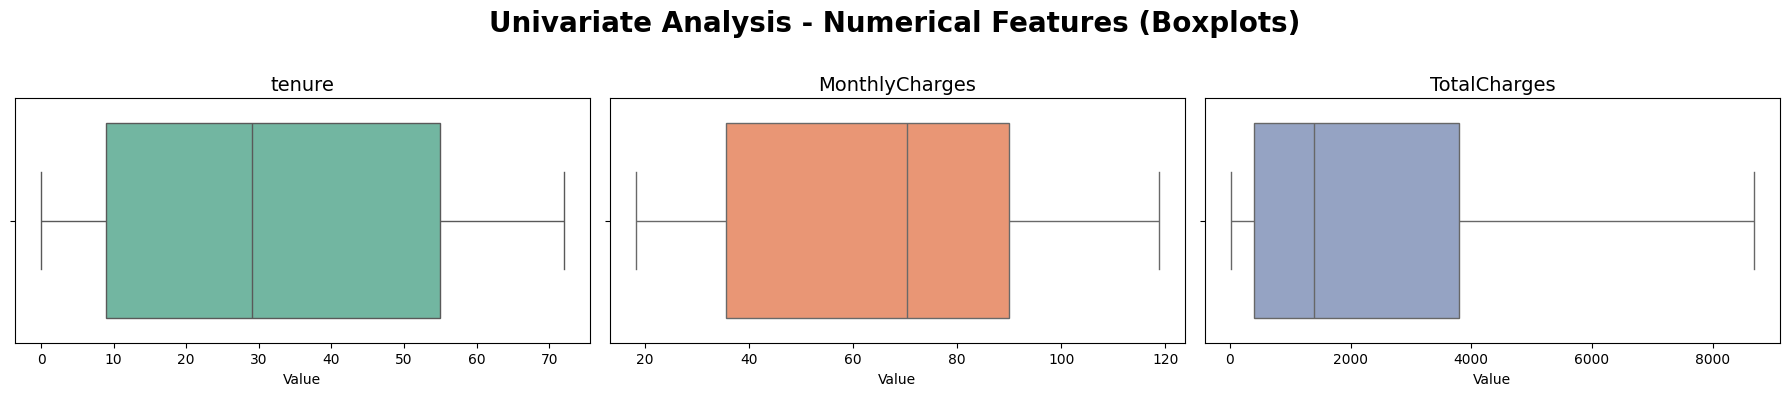

In [23]:
# using above function
plot_numerical_boxplot(telco_df, exclude_cols=None,n_cols=3, palette="Set2")

In [24]:
# function to visualize summary table
def plot_numerical_summary_table(df, exclude_cols=None):
  num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
  if exclude_cols:
    num_cols = [col for col in num_cols if col not in exclude_cols]
  summary_table = pd.DataFrame({
      "Mean":df[num_cols].mean(),
      "Median":df[num_cols].median(),
      "Mode":df[num_cols].mode().iloc[0],
      "Standard Deviation":df[num_cols].std(),
      "Minimum":df[num_cols].min(),
      "Maximum":df[num_cols].max(),
      "Skewness":df[num_cols].skew(),
      "Kurtosis":df[num_cols].kurtosis()
  }).round(3)
  fig,ax = plt.subplots(figsize=(12, len(num_cols)*0.5+2))
  ax.axis('off')
  table = ax.table(cellText=summary_table.values,
                   colLabels=summary_table.columns,
                   rowLabels=summary_table.index,
                   cellLoc='center',
                   loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)
  table.scale(1,1.2)
  fig.suptitle("Univariate Analysis - Numerical Features (Summary Statistics)", fontsize=16,fontweight='bold')
  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/univariate_numerical_summaryTable.png',bbox_inches='tight')
  plt.show()

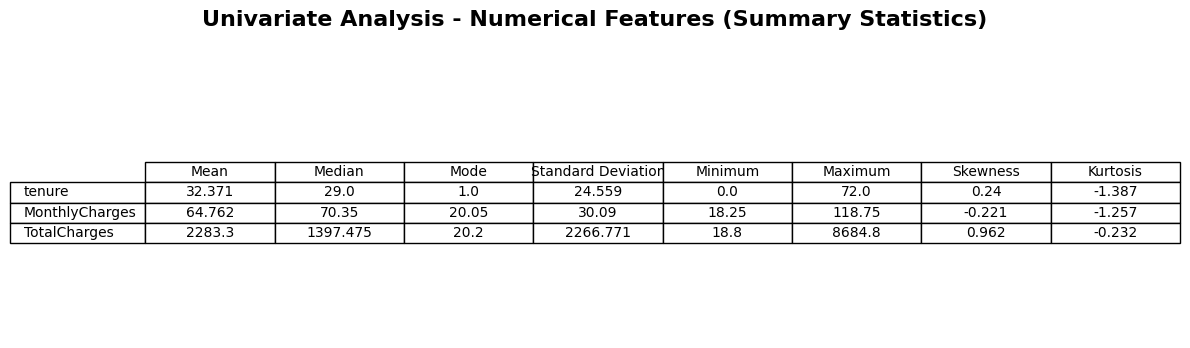

In [25]:
# using above function
plot_numerical_summary_table(telco_df,exclude_cols=None)

### *Phase 03: Bivariate Analysis*

Step 01: Categorical Vs Target

In [26]:
# plotting categorical vs target
def plot_all_cat_vs_target(df, target_col, exclude_cols=None,n_cols=3, palette="husl"):
  # convert target to numeric (Yes=1, No=0)
  df = df.copy()
  df[target_col]=df[target_col].map({"Yes":1, "No":0})
  cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
  if exclude_cols:
    cat_cols = [col for col in cat_cols if col not in exclude_cols]
  n_rows = (len(cat_cols)+n_cols-1)//n_cols
  fig, axes = plt.subplots(n_rows,n_cols, figsize=(18,5*n_rows))
  axes = axes.flatten()
  fig.suptitle("Bivariate Analysis - Categorical Vs Target (Churn Rates)", fontsize=20, fontweight='bold')
  for i, col in enumerate(cat_cols):
    rates = df.groupby(col)[target_col].mean().sort_values(ascending=False)
    counts = df[col].value_counts().reindex(rates.index)
    colors = sns.color_palette(palette, len(rates))
    sns.barplot(x=rates.values, y=rates.index, ax=axes[i],palette=colors)
    axes[i].set_title(f"Churn Rate by {col}", fontsize=14)
    axes[i].set_xlabel("Target Rate")
    axes[i].set_xlim(0,1)

    for j, (rate,cnt) in enumerate(zip(rates.values,counts.values)):
      axes[i].text(rate+0.01,j, f"{rate:.2%} (n={cnt})", va="center")
  for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/bivariate_categorical_vs_target.png',bbox_inches='tight')
  plt.show()

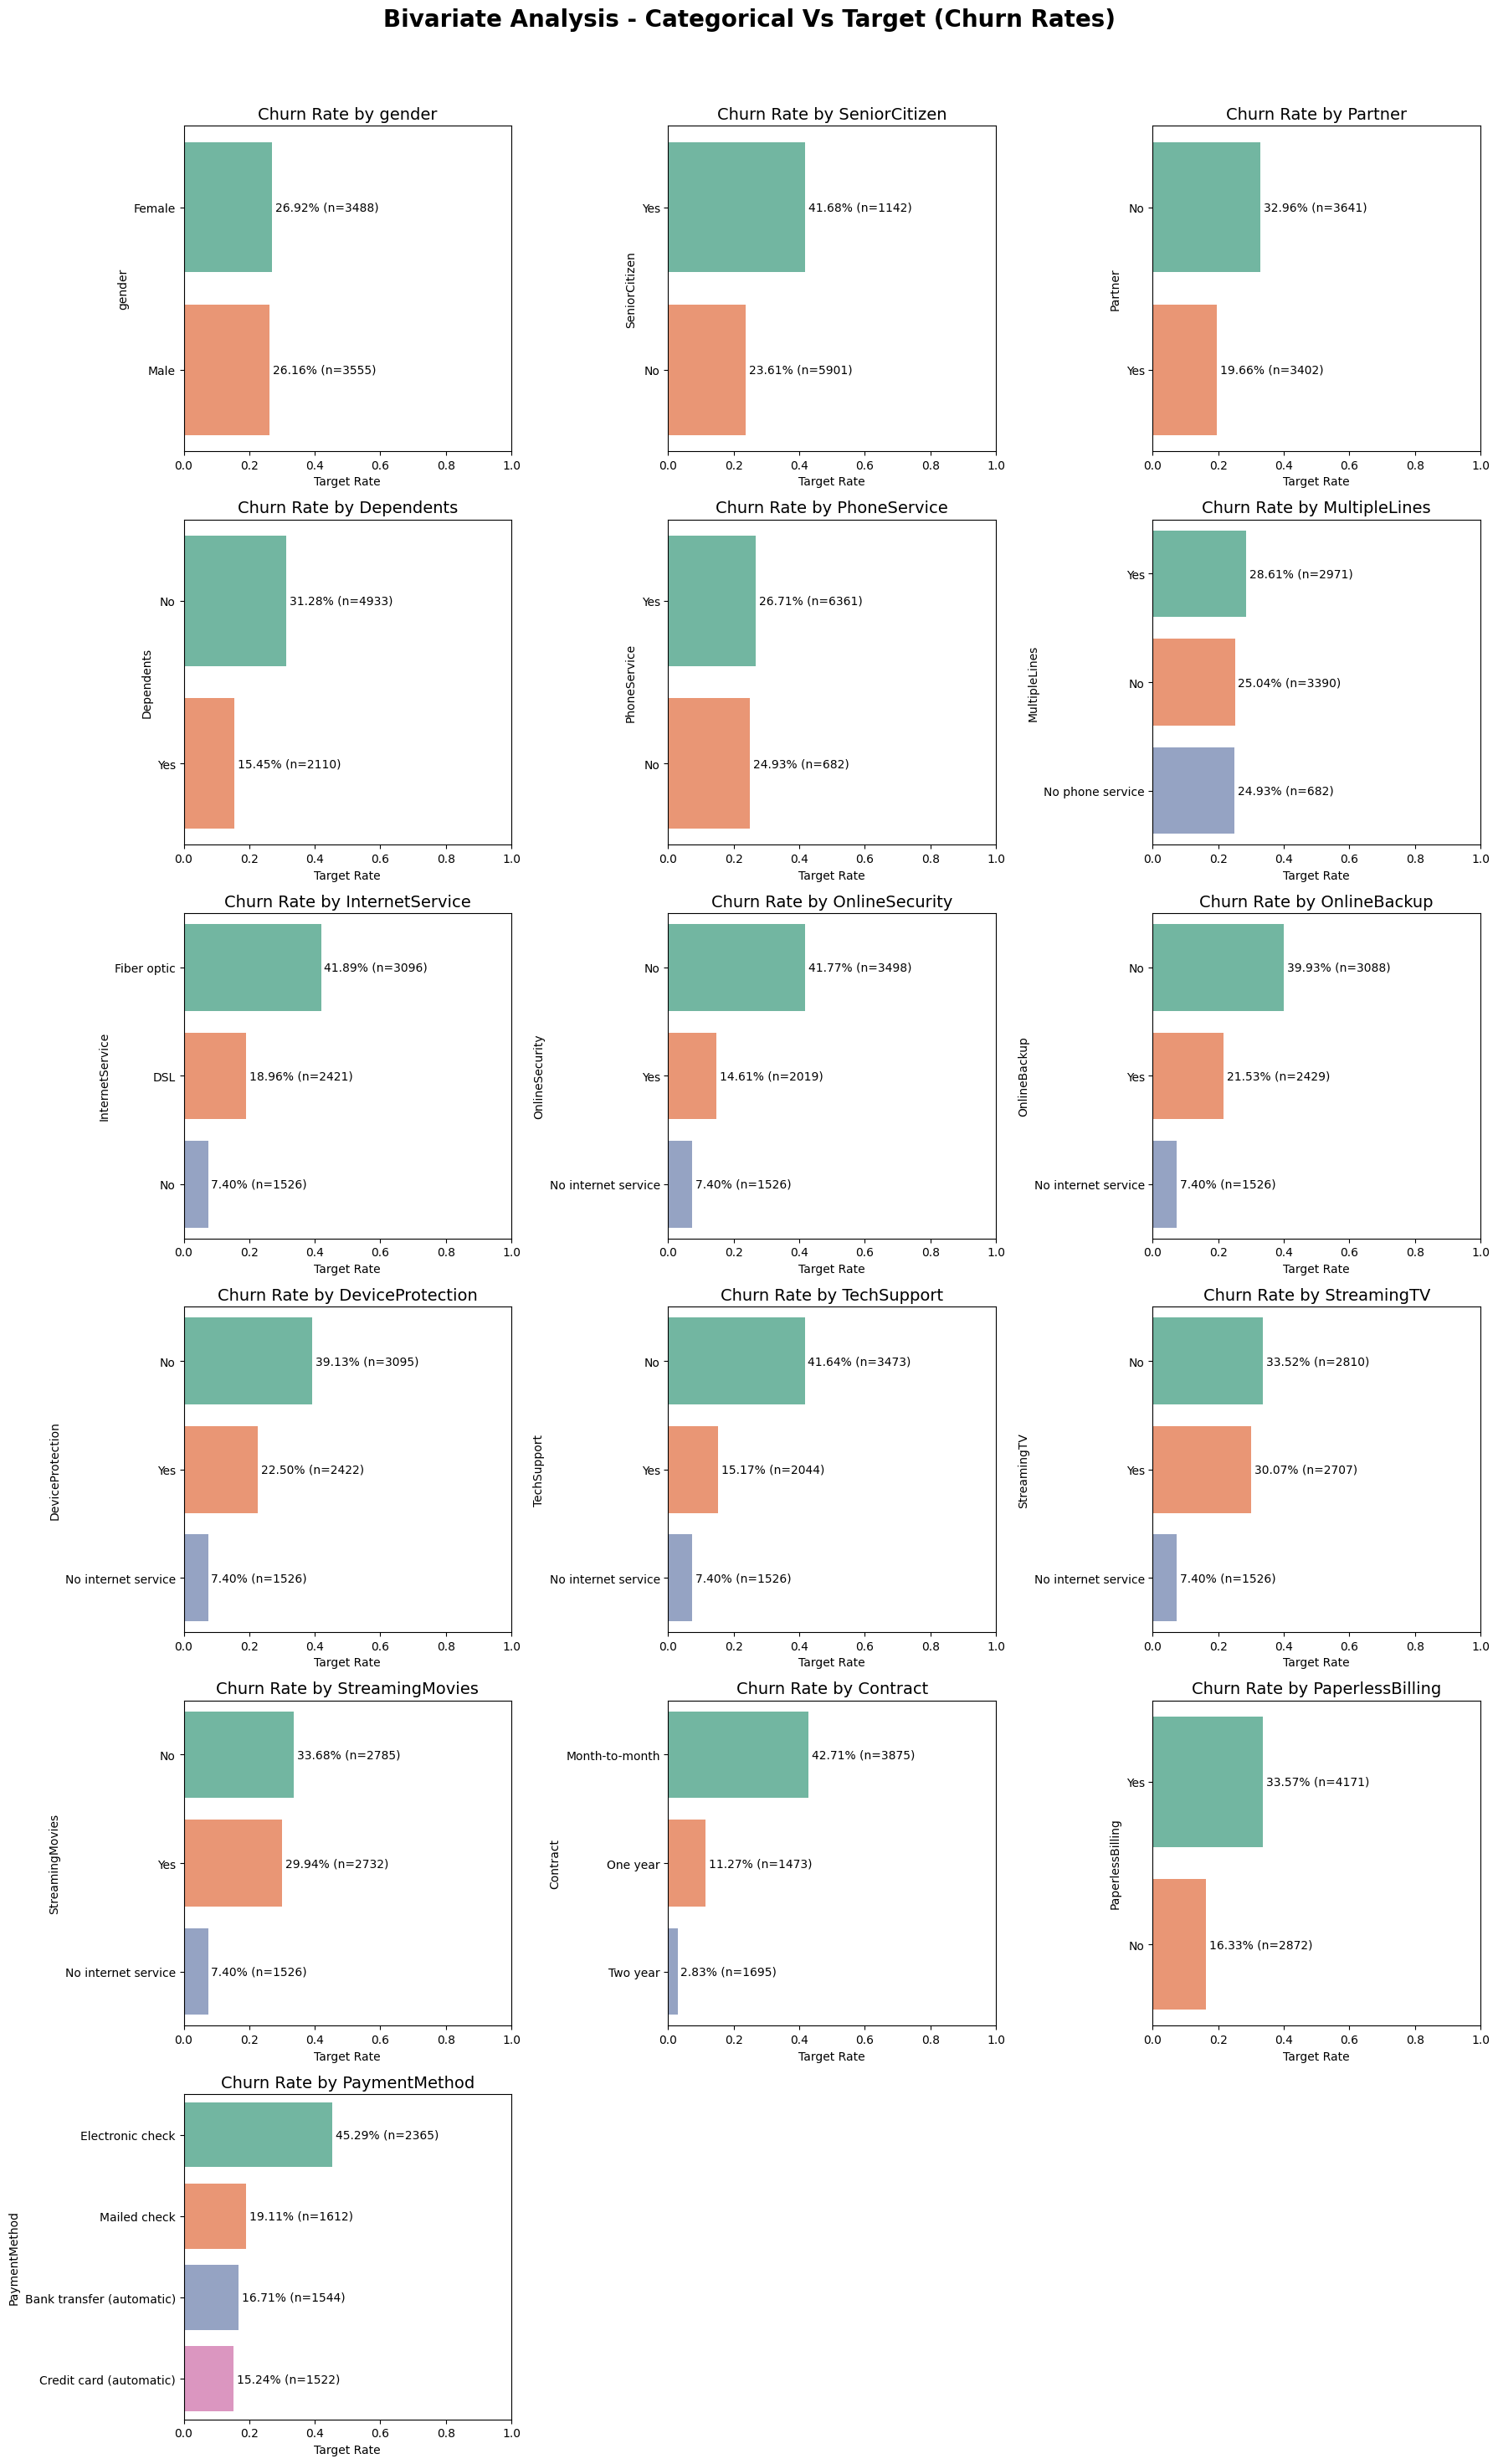

In [27]:
# using above function
plot_all_cat_vs_target(telco_df, target_col='Churn', exclude_cols=['customerID'],n_cols=3, palette="Set2")


Step 02: Numerical Vs Target

In [28]:

# plotting numerical vs target
def plot_num_vs_target_boxgrid(df,target_col,exclude_cols=None,n_cols=3,palette="husl"):
  df = df.copy()
  df[target_col]=df[target_col].map({"Yes":1, "No":0})
  num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
  if exclude_cols:
    num_cols = [col for col in num_cols if col not in exclude_cols]
  n_rows = (len(num_cols)+n_cols-1)//n_cols
  fig, axes= plt.subplots(n_rows,n_cols, figsize=(18,5*n_rows))
  axes = axes.flatten()
  fig.suptitle("Bivariate Analysis - Numerical Vs Target (Box Plots)", fontsize=20, fontweight='bold')
  for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=target_col, y=col, ax=axes[i], palette=palette)
    axes[i].set_title(f"Boxplot of {col} vs {target_col}", fontsize=14)
    axes[i].set_xlabel("Target (0=No, 1=Yes)")
    axes[i].set_ylabel(col)
    medians = df.groupby(target_col)[col].median()
    for j,median in enumerate(medians):
      axes[i].text(j, median, f"Median={median:.2f}", ha="center", va= 'bottom', fontsize=9, color="black")
  for j in range(len(num_cols),len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout(rect=[0,0,1,0.96])
  plt.savefig('/content/drive/MyDrive/ML_Coursework/bivariate_numerical_vs_target.png',bbox_inches='tight')
  plt.show()

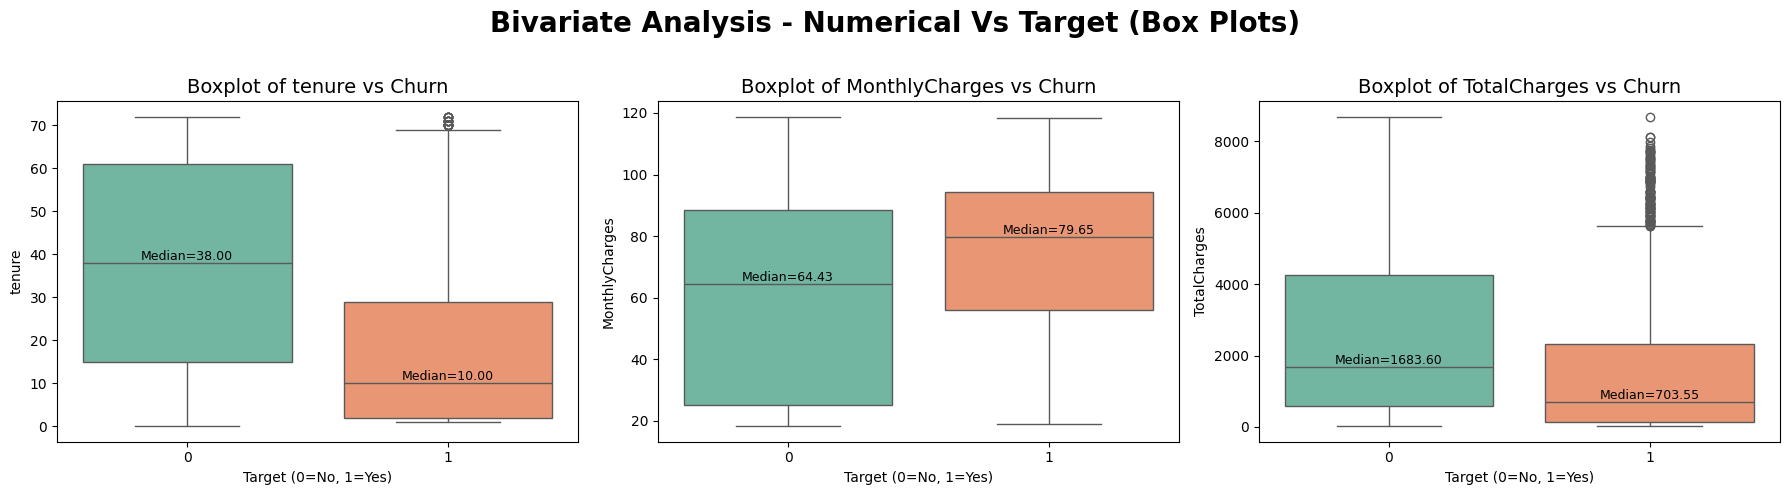

In [29]:
# using above function
plot_num_vs_target_boxgrid(telco_df, target_col="Churn",exclude_cols=["Churn"],n_cols=3,palette="Set2")

### *Phase 04: Multivariate Analysis*

Step 01: Numerical Vs Numerical

In [30]:
# correlation heatmap
def plot_correlation_heatmap(df, exclude_cols=None, method="pearson", cmap="coolwarm"):
  df = df.copy()
  num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
  if exclude_cols:
    num_cols = [col for col in num_cols if col not in exclude_cols]
  corr = df[num_cols].corr(method=method)
  fig, ax = plt.subplots(figsize=(10,8))
  sns.heatmap(corr, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
  plt.title(f"Correlation Heatmap of Numerical Features ({method.title()})", fontsize=16, fontweight = 'bold')
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/ML_Coursework/correlation_heatmap.png', dpi=150 ,bbox_inches='tight')
  plt.show()

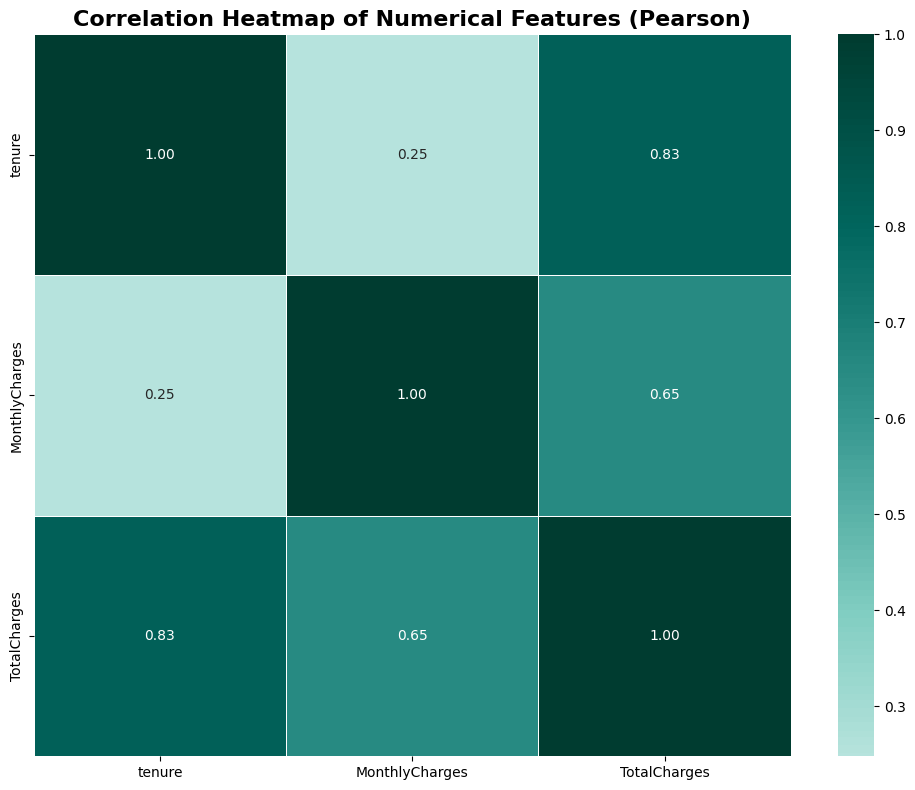

In [31]:
# using above function
plot_correlation_heatmap(telco_df, exclude_cols=None, method="pearson", cmap="BrBG")

Relationship {TotalCharge = tenure * MonthlyCharge}

In [36]:
from sklearn.linear_model import LinearRegression
telco_df_copy = telco_df.copy()
telco_df_copy['TotalCharges'] = pd.to_numeric(telco_df_copy['TotalCharges'], errors='coerce')
telco_df_copy.dropna(subset=['TotalCharges'], inplace=True)
telco_df_copy['Tenure*MonthlyCharge'] = telco_df_copy['tenure'] * telco_df_copy['MonthlyCharges']
telco_df_copy['Difference'] = telco_df_copy['TotalCharges'] - telco_df_copy['Tenure*MonthlyCharge']
# correlation check
corr = telco_df_copy[['TotalCharges','Tenure*MonthlyCharge']].corr().iloc[0,1]
print("Correlation between TotalCharges and Tenure*MonthlyCharge:", corr)
# regression check
X = telco_df_copy['Tenure*MonthlyCharge'].to_frame() # Convert Series to DataFrame
y = telco_df_copy['TotalCharges']
model = LinearRegression().fit(X,y)
print("Regression Score:", model.coef_[0])
print("Regression intercept:",model.intercept_)
print("R^2 score:",model.score(X,y))

Correlation between TotalCharges and Tenure*MonthlyCharge: 0.9995598572867943
Regression Score: 1.0004726148055192
Regression intercept: -0.9258566443727432
R^2 score: 0.9991199082991953
